In [162]:
#NÉGYMEZŐ-TESZT MELLRÁKRA
import pandas as pd

#adatok beolvasása
df = pd.read_csv('breast_cancer.csv')

#segédtáblázat létrehozása
helper_table = pd.DataFrame(columns=['meggyógyult', 'kiújult a rák/meghalt'], index=['hormon kezeltek', 'nem hormon kezeltek', 'összesen'])

#kategóriák szerinti összesítés
helper_table.loc['hormon kezeltek', 'meggyógyult'] = len(df[(df['hormon'] == 1) & (df['status'] == 0)])
helper_table.loc['hormon kezeltek', 'kiújult a rák/meghalt'] = len(df[(df['hormon'] == 1) & (df['status'] == 1)])
helper_table.loc['nem hormon kezeltek', 'meggyógyult'] = len(df[(df['hormon'] == 0) & (df['status'] == 0)])
helper_table.loc['nem hormon kezeltek', 'kiújult a rák/meghalt'] = len(df[(df['hormon'] == 0) & (df['status'] == 1)])
helper_table.loc['összesen', 'meggyógyult'] = len(df[df['status'] == 0])
helper_table.loc['összesen', 'kiújult a rák/meghalt'] = len(df[df['status'] == 1])

#"összesen" oszlop hozzáadása a sorösszegekhez
helper_table['összesen'] = helper_table.sum(axis=1)

print(helper_table)

                    meggyógyult kiújult a rák/meghalt összesen
hormon kezeltek             152                    94      246
nem hormon kezeltek         235                   205      440
összesen                    387                   299      686


In [163]:
#khínégyzet statisztika

E_A = len(df[(df['hormon'] == 1) & (df['status'] == 0)])
M_A = len(df[(df['hormon'] == 1) & (df['status'] == 1)])
E_B = len(df[(df['hormon'] == 0) & (df['status'] == 0)])
M_B = len(df[(df['hormon'] == 0) & (df['status'] == 1)])

khi_negyzet = ((len(df[df['hormon']==1]) + len(df[df['hormon']==0]))*
               (((E_A*M_B)-(E_B*M_A))**2))/((E_A + E_B)*(M_A+M_B)*(E_A+M_A)*(E_B+M_B))

print(khi_negyzet)

4.505767238078763


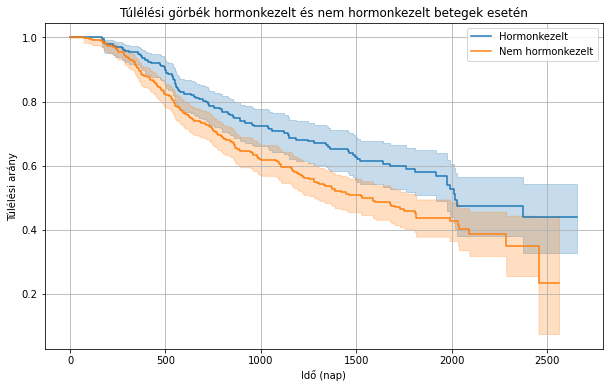

In [119]:
#HORMONKEZELÉSTŐL FÜGG-E A TÚLÉLÉS VALÓSZÍNŰSÉGE
#rossz ábra, mert a meggyógyultakat csak a megfigyelés végéig tartja számon
#Kaplan_Meier becslővel túlélési görbék
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

#adatok beolvasása
df = pd.read_csv('breast_cancer.csv')

#hormonkezeltek-nem hormonkezeltek szétválasztása
hormon_treated = df[df['hormon'] == 1]
hormon_not_treated = df[df['hormon'] == 0]

#rövidítés bevezetése
kmf = KaplanMeierFitter()

#hormonkezeltek túlélési görbéje
plt.figure(figsize=(10, 6))
kmf.fit(durations=hormon_treated['rfstime'], event_observed=hormon_treated['status'], label='Hormonkezelt')
kmf.plot_survival_function()

#nem hormonkezeltek túlélési görbéje
kmf.fit(durations=hormon_not_treated['rfstime'], event_observed=hormon_not_treated['status'], label='Nem hormonkezelt')
kmf.plot_survival_function()

#diagramm
plt.title('Túlélési görbék hormonkezelt és nem hormonkezelt betegek esetén')
plt.xlabel('Idő (nap)')
plt.ylabel('Túlélési arány')
plt.legend()
plt.grid(True)
plt.show()

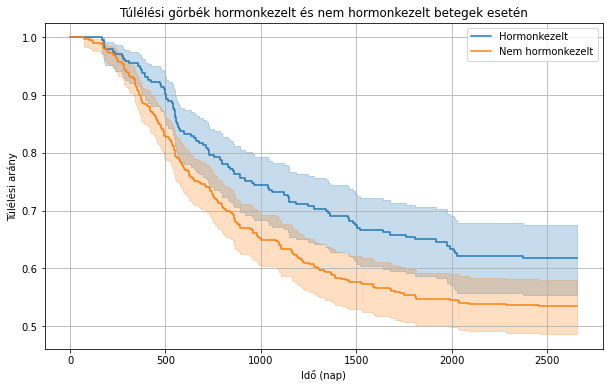

In [120]:
#javított ábra - feltételezzük, hogy a meggyógyultak az utolsó megfigyelés után is továbbra is egészségesek
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

#adatok beolvasása
df = pd.read_csv('breast_cancer.csv')

#maximális megfigyelési idő
max_rfstime = df['rfstime'].max()

#új DataFrame létrehozása módosításokkal - meggyógyultak az utolsó beteg megfigyelési idejéig maradjon az
modified_df = df.copy()
modified_df.loc[modified_df['status'] == 0, 'rfstime'] = max_rfstime

#módosított adatok mentése új fájlba
modified_df.to_csv('breast_cancer_mod1.csv', index=False)

#hormonkezeltek és nem hormonkezeltek szétválasztása
hormon_treated_modified = modified_df[modified_df['hormon'] == 1]
hormon_not_treated_modified = modified_df[modified_df['hormon'] == 0]

#Kaplan-Meier becslő
kmf = KaplanMeierFitter()

#hormonkezeltek túlélési görbéje
plt.figure(figsize=(10, 6))
kmf.fit(durations=hormon_treated_modified['rfstime'], event_observed=hormon_treated_modified['status'], label='Hormonkezelt')
kmf.plot_survival_function()

#nem hormonkezeltek túlélési görbéje
kmf.fit(durations=hormon_not_treated_modified['rfstime'], event_observed=hormon_not_treated_modified['status'], label='Nem hormonkezelt')
kmf.plot_survival_function()

#diagramm
plt.title('Túlélési görbék hormonkezelt és nem hormonkezelt betegek esetén')
plt.xlabel('Idő (nap)')
plt.ylabel('Túlélési arány')
plt.legend()
plt.grid(True)
plt.show()

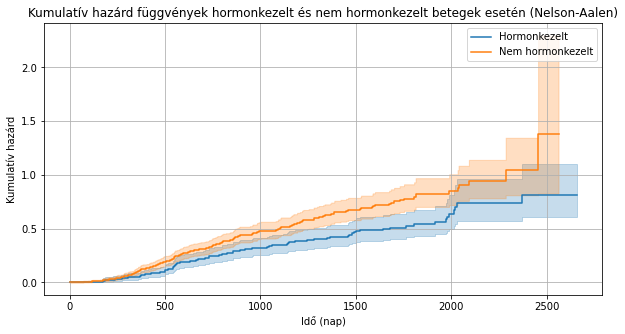

In [121]:
#Nelson-Aalen becslővel
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import NelsonAalenFitter

#adatok beolvasása
df = pd.read_csv('breast_cancer.csv')
#hormonkezeltek-nem hormonkezeltek szétválasztása
hormon_treated = df[df['hormon'] == 1]
hormon_not_treated = df[df['hormon'] == 0]

#rövidítés bevezetése
naf = NelsonAalenFitter()

#hormonkezeltek túlélési görbéje
plt.figure(figsize=(10, 5))
naf.fit(durations=hormon_treated['rfstime'], event_observed=hormon_treated['status'], label='Hormonkezelt')
naf.plot_cumulative_hazard()

#nem hormonkezeltek túlélési görbéje
naf.fit(durations=hormon_not_treated['rfstime'], event_observed=hormon_not_treated['status'], label='Nem hormonkezelt')
naf.plot_cumulative_hazard()

#Diagramm
plt.title('Kumulatív hazárd függvények hormonkezelt és nem hormonkezelt betegek esetén (Nelson-Aalen)')
plt.xlabel('Idő (nap)')
plt.ylabel('Kumulatív hazárd')
plt.legend()
plt.grid(True)
plt.show()

#Egyre több nem hormonkezelt kerül veszélybe az idő előre haladtával a hormonkezeltekkel szemben
#Ha a kumulatív hazard függvény egy adott időpontban 2, akkor ez azt jelenti, 
#hogy az adott időpontig az esemény bekövetkezésének összesített kockázata 2. 
#Ez nem egy valószínűségi érték, hanem egy intenzitási mérőszám.
#Az idő előrehaladtával hogyan növekszik az események bekövetkezésének összesített kockázata.

In [122]:
#adatokból tau segítségével a jók kiszűrése
import pandas as pd
#adatok beolvasása
df = pd.read_csv('breast_cancer.csv')

hormon_treated = df[df['hormon'] == 1]
hormon_not_treated = df[df['hormon'] == 0]

#Tau meghatározása: a hormonkezeltek és nem hormonkezeltek maximális rfstime-jainak minimuma
tau = min(hormon_treated['rfstime'].max(), hormon_not_treated['rfstime'].max())
print(f"Tau értéke: {tau}")

#szűrt adathalmaz létrehozása, amely csak azokat a sorokat tartalmazza, ahol rfstime <= tau
filtered_df = df[df['rfstime'] <= tau]
filtered_df.to_csv('breast_cancer_filtered1.csv', index=False)

Tau értéke: 2563


In [129]:
#első módszer - log-rank (W(t_i) = 1)
import pandas as pd
import numpy as np

#adatok beolvasása
df1 = pd.read_csv('breast_cancer_filtered1.csv')

#legnagyobb időpont, amikor bekövetkezett az esemény
max_event_time = df1[df1['status'] == 1]['rfstime'].max()
print(max_event_time)

#segédtáblázat létrehozása
time_range = range(1, max_event_time+1)

result_df1 = pd.DataFrame({'idő': time_range})



# Ciklus minden időpontra
for t in time_range:
    # Hormonkezeltek (hormon = 1)
    Y_i1 = int(len(df1[(df1['hormon'] == 1) & (df1['rfstime'] >= t)]))  #vizsgált hormonkezeltek száma
    d_i1 = int(len(df1[(df1['hormon'] == 1) & (df1['rfstime'] == t) & (df1['status'] == 1)]))  #meghalt/kiújult rák
    
    # Nem hormonkezeltek (hormon = 0)
    Y_i2 = int(len(df1[(df1['hormon'] == 0) & (df1['rfstime'] >= t)]))  #vizsgált nem hormonkezeltek száma
    d_i2 = int(len(df1[(df1['hormon'] == 0) & (df1['rfstime'] == t) & (df1['status'] == 1)]))  #meghalt/kiújult rák
    
    #összes vizsgált egyed és összes kiújult rák/meghalt
    Y_i = Y_i1 + Y_i2
    d_i = d_i1 + d_i2
    

    if Y_i > 0: #ne legyen 0 az osztó
        term_1 = Y_i1 * (d_i / Y_i) if Y_i > 0 else 0
        term_2 = d_i1 - term_1
        term_3 = (Y_i1 / Y_i) * (1 - (Y_i1 / Y_i)) * ((Y_i - d_i) / (Y_i - 1)) * d_i if Y_i > 1 else 0
    else:
        term_1 = term_2 = term_3 = np.nan  #ha Y_i nulla, a kifejezések nincsenek értelmezve

    #hozzáadjuk az értékeket az eredménytáblához
    result_df1.loc[t-1, 'Y_i1'] = Y_i1
    result_df1.loc[t-1, 'd_i1'] = d_i1
    result_df1.loc[t-1, 'Y_i2'] = Y_i2
    result_df1.loc[t-1, 'd_i2'] = d_i2
    result_df1.loc[t-1, 'Y_i'] = Y_i
    result_df1.loc[t-1, 'd_i'] = d_i
    result_df1.loc[t-1, 'Y_i1*(d_i/Y_i)'] = term_1
    result_df1.loc[t-1, 'd_i1-Y_i1*(d_i/Y_i)'] = term_2
    result_df1.loc[t-1, '(Y_i1/Y_i)*(1-(Y_i1/Y_i))*((Y_i-d_i)/(Y_i-1))*d_i'] = term_3


# Megjelenítés index nélkül
print(result_df1.head(10).to_string(index=False))

2456
 idő  Y_i1  d_i1  Y_i2  d_i2   Y_i  d_i  Y_i1*(d_i/Y_i)  d_i1-Y_i1*(d_i/Y_i)  (Y_i1/Y_i)*(1-(Y_i1/Y_i))*((Y_i-d_i)/(Y_i-1))*d_i
   1 244.0   0.0 440.0   0.0 684.0  0.0             0.0                  0.0                                                0.0
   2 244.0   0.0 440.0   0.0 684.0  0.0             0.0                  0.0                                                0.0
   3 244.0   0.0 440.0   0.0 684.0  0.0             0.0                  0.0                                                0.0
   4 244.0   0.0 440.0   0.0 684.0  0.0             0.0                  0.0                                                0.0
   5 244.0   0.0 440.0   0.0 684.0  0.0             0.0                  0.0                                                0.0
   6 244.0   0.0 440.0   0.0 684.0  0.0             0.0                  0.0                                                0.0
   7 244.0   0.0 440.0   0.0 684.0  0.0             0.0                  0.0                       

In [128]:
#adatok ellenőrzés: t = 72
t_value = 72
t_data = result_df[result_df['idő'] == t_value]

#kiíratjuk a t = 72-hez tartozó sor értékeit
print(f"Adatok t = {t_value}-nél:")
print(t_data)

Adatok t = 72-nél:
    idő   Y_i1  d_i1   Y_i2  d_i2    Y_i  d_i  Y_i1*(d_i/Y_i)  \
71   72  240.0   0.0  430.0   1.0  670.0  1.0        0.358209   

    (d_i1-Y_i1*(d_i/Y_i))*Y_i  \
71                     -240.0   

    ((Y_i1/Y_i)*(1-(Y_i1/Y_i))*((Y_i-d_i)/(Y_i-1))*d_i)*((Y_i)**2)  
71                                           103200.0               


In [130]:
#z kiszámolása
import pandas as pd
import math

z_nevezo = math.sqrt(result_df1['(Y_i1/Y_i)*(1-(Y_i1/Y_i))*((Y_i-d_i)/(Y_i-1))*d_i'].sum())
z_szamlalo = result_df1['d_i1-Y_i1*(d_i/Y_i)'].sum()

#print(z_nevezo, z_szamlalo)

z = z_szamlalo/z_nevezo
z

-2.790321846231398

In [131]:
#p-érték kiszámítása
import scipy.stats as stats

#annak a valószínűsége, hogy Z <= z egy standard normális eloszlás esetén
probability = stats.norm.cdf(z)

#valószínűség szorzása 2-vel
result = 2 * probability

print("Az eredmény:", result)

Az eredmény: 0.00526556697375739


In [132]:
#második módszer - log-rank (W(t_i) = 1)
import pandas as pd
from lifelines.statistics import logrank_test

#fájlbeolvasás
df1 = pd.read_csv('breast_cancer_filtered1.csv')

#különválasztjuk a hormonkezelt és nem hormonkezelt betegek adatait
hormon_treated = df1[df1['hormon'] == 1]
hormon_not_treated = df1[df1['hormon'] == 0]

#log-rank teszt elvégzése
results = logrank_test(hormon_treated['rfstime'], hormon_not_treated['rfstime'],
                       event_observed_A=hormon_treated['status'], event_observed_B=hormon_not_treated['status'])

#eredmények kiíratása
print(results.summary)

   test_statistic         p  -log2(p)
0        7.785896  0.005266  7.569195


In [134]:
#harmadik módszer - Gehan súlyokkal (W(t_i) = Y_i)
import pandas as pd
import numpy as np

#adatok beolvasása
df1 = pd.read_csv('breast_cancer_filtered1.csv')

#segédtáblázat létrehozása
time_range = range(1, max_event_time+1)

result_df1_uj = pd.DataFrame({'idő': time_range})



# Ciklus minden időpontra
for t in time_range:
    # Hormonkezeltek (hormon = 1)
    Y_i1 = int(len(df1[(df1['hormon'] == 1) & (df1['rfstime'] >= t)]))  #vizsgált hormonkezeltek száma
    d_i1 = int(len(df1[(df1['hormon'] == 1) & (df1['rfstime'] == t) & (df1['status'] == 1)]))  #meghalt/kiújult rák
    
    # Nem hormonkezeltek (hormon = 0)
    Y_i2 = int(len(df1[(df1['hormon'] == 0) & (df1['rfstime'] >= t)]))  #vizsgált nem hormonkezeltek száma
    d_i2 = int(len(df1[(df1['hormon'] == 0) & (df1['rfstime'] == t) & (df1['status'] == 1)]))  #meghalt/kiújult rák
    
    #összes vizsgált egyed és összes kiújult rák/meghalt
    Y_i = Y_i1 + Y_i2
    d_i = d_i1 + d_i2
    

    if Y_i > 0: #ne legyen 0 az osztó
        term_1 = Y_i1 * (d_i / Y_i)
        term_2 = (d_i1 - term_1)*Y_i #súllyal beszorzás
        term_3 = ((Y_i1 / Y_i) * (1 - (Y_i1 / Y_i)) * ((Y_i - d_i) / (Y_i - 1)) * d_i)*((Y_i)**2) #súllyal beszorzás
    else:
        term_1 = term_2 = term_3 = trem_4 = np.nan  #ha Y_i nulla, a kifejezések nincsenek értelmezve

    #hozzáadjuk az értékeket az eredménytáblához
    result_df1_uj.loc[t-1, 'Y_i1'] = Y_i1
    result_df1_uj.loc[t-1, 'd_i1'] = d_i1
    result_df1_uj.loc[t-1, 'Y_i2'] = Y_i2
    result_df1_uj.loc[t-1, 'd_i2'] = d_i2
    result_df1_uj.loc[t-1, 'Y_i'] = Y_i
    result_df1_uj.loc[t-1, 'd_i'] = d_i
    result_df1_uj.loc[t-1, 'Y_i1*(d_i/Y_i)'] = term_1
    result_df1_uj.loc[t-1, '(d_i1-Y_i1*(d_i/Y_i))*Y_i'] = term_2 #sor értéke változik!
    result_df1_uj.loc[t-1, '((Y_i1/Y_i)*(1-(Y_i1/Y_i))*((Y_i-d_i)/(Y_i-1))*d_i)*((Y_i)**2)'] = term_3 #sor értéke változik!

# Megjelenítés index nélkül
print(result_df1_uj.head(10).to_string(index=False))

 idő  Y_i1  d_i1  Y_i2  d_i2   Y_i  d_i  Y_i1*(d_i/Y_i)  (d_i1-Y_i1*(d_i/Y_i))*Y_i  ((Y_i1/Y_i)*(1-(Y_i1/Y_i))*((Y_i-d_i)/(Y_i-1))*d_i)*((Y_i)**2)
   1 244.0   0.0 440.0   0.0 684.0  0.0             0.0                        0.0                                                             0.0
   2 244.0   0.0 440.0   0.0 684.0  0.0             0.0                        0.0                                                             0.0
   3 244.0   0.0 440.0   0.0 684.0  0.0             0.0                        0.0                                                             0.0
   4 244.0   0.0 440.0   0.0 684.0  0.0             0.0                        0.0                                                             0.0
   5 244.0   0.0 440.0   0.0 684.0  0.0             0.0                        0.0                                                             0.0
   6 244.0   0.0 440.0   0.0 684.0  0.0             0.0                        0.0                                    

In [137]:
#z kiszámítása
import pandas as pd
import math

z_nevezo_uj = math.sqrt(result_df1_uj['((Y_i1/Y_i)*(1-(Y_i1/Y_i))*((Y_i-d_i)/(Y_i-1))*d_i)*((Y_i)**2)'].sum())
z_szamlalo_uj = result_df1_uj['(d_i1-Y_i1*(d_i/Y_i))*Y_i'].sum()

#print(z_nevezo, z_szamlalo)

z_uj = z_szamlalo_uj/z_nevezo_uj
z_uj

-2.803231532483595

In [138]:
#p-érték kiszámítása
import scipy.stats as stats

#annak a valószínűsége, hogy Z <= z egy standard normális eloszlás esetén
probability_uj = stats.norm.cdf(z_uj)

#valószínűség szorzása 2-vel
result_uj = 2 * probability_uj

print("Az eredmény:", result_uj)

#nem nagyon változik az eredmény, ebben az esetbne nincs sok különbség a 2 súlyfüggvény között

Az eredmény: 0.0050593334215644475


In [139]:
#KORTÓL FÜGG-E A TÚLÉLÉS VALÓSZÍNŰSÉGE
#adatokból tau segítségével a jók kiszűrése
import pandas as pd
#adatok beolvasása
df = pd.read_csv('breast_cancer.csv')

idos = df[df['age'] > 50]
fiatal = df[df['age'] <= 50]

#Tau meghatározása: idősek és fiatalok maximális rfstime-jainak minimuma
tau_2 = min(idos['rfstime'].max(), fiatal['rfstime'].max())
print(f"Tau értéke: {tau}")

#szűrt adathalmaz létrehozása
filtered2_df = df[df['rfstime'] <= tau_2]
filtered2_df.to_csv('breast_cancer_filtered2.csv', index=False)

Tau értéke: 2563


In [140]:
#log-rank staisztika
import pandas as pd
from lifelines.statistics import logrank_test

#fájlbeolvasás
df2 = pd.read_csv('breast_cancer_filtered2.csv')

#különválasztjuk a hormonkezelt és nem hormonkezelt betegek adatait
idos = df2[df2['age'] > 50]
fiatal = df2[df2['age'] <= 50]

#log-rank teszt elvégzése
results_2 = logrank_test(idos['rfstime'], fiatal['rfstime'],
                       event_observed_A=idos['status'], event_observed_B=fiatal['status'])

#eredmények kiíratása
print(results_2.summary)

   test_statistic         p  -log2(p)
0        1.988128  0.158537  2.657111


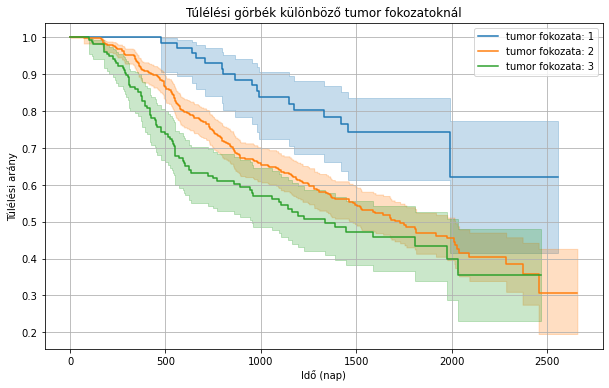

In [92]:
#TUMOR FOKOZATÁTÓL FÜGG-E A TÚLÉLÉS VALÓSZÍNŰSÉGE
#Kaplan_Meier becslővel túlélési görbék - rossz változat
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

#adatok beolvasása
df = pd.read_csv('breast_cancer.csv')

#hormonkezeltek-nem hormonkezeltek szétválasztása
elso = df[df['grade'] == 1]
masodik = df[df['grade'] == 2]
harmadik = df[df['grade'] == 3]

#rövidítés bevezetése
kmf = KaplanMeierFitter()

#elso tumor fokozat túlélési görbéje
plt.figure(figsize=(10, 6))
kmf.fit(durations=elso['rfstime'], event_observed=elso['status'], label='tumor fokozata: 1')
kmf.plot_survival_function()

#masodik tumor fokozat túlélési görbéje
kmf.fit(durations=masodik['rfstime'], event_observed=masodik['status'], label='tumor fokozata: 2')
kmf.plot_survival_function()

#harmadik tumor fokozat túlélési görbéje
kmf.fit(durations=harmadik['rfstime'], event_observed=harmadik['status'], label='tumor fokozata: 3')
kmf.plot_survival_function()

#diagramm
plt.title('Túlélési görbék különböző tumor fokozatoknál')
plt.xlabel('Idő (nap)')
plt.ylabel('Túlélési arány')
plt.legend()
plt.grid(True)
plt.show()

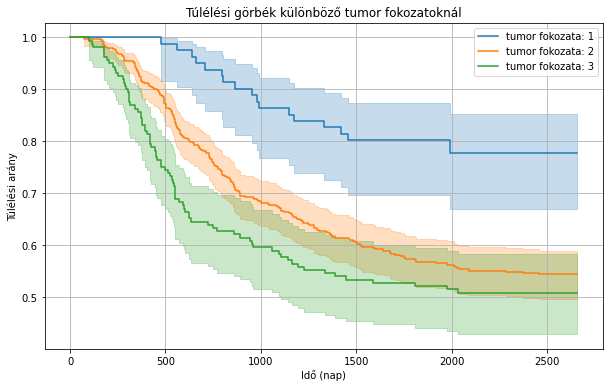

In [141]:
#Kaplan_Meier becslővel túlélési görbék -javított változat
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

#adatok beolvasása - túlélőknél rfstime módosítása, hogy úgy legyen a becslés, hogy akik meggyógyultak, azok azóta is vígan élnek
modified_df = pd.read_csv('breast_cancer_mod1.csv')

#tumor fokozatai szerint szortírozás
elso = modified_df[modified_df['grade'] == 1]
masodik = modified_df[modified_df['grade'] == 2]
harmadik = modified_df[modified_df['grade'] == 3]

#rövidítés bevezetése
kmf = KaplanMeierFitter()

#elso tumor fokozat túlélési görbéje
plt.figure(figsize=(10, 6))
kmf.fit(durations=elso['rfstime'], event_observed=elso['status'], label='tumor fokozata: 1')
kmf.plot_survival_function()

#masodik tumor fokozat túlélési görbéje
kmf.fit(durations=masodik['rfstime'], event_observed=masodik['status'], label='tumor fokozata: 2')
kmf.plot_survival_function()

#harmadik tumor fokozat túlélési görbéje
kmf.fit(durations=harmadik['rfstime'], event_observed=harmadik['status'], label='tumor fokozata: 3')
kmf.plot_survival_function()

#diagramm
plt.title('Túlélési görbék különböző tumor fokozatoknál')
plt.xlabel('Idő (nap)')
plt.ylabel('Túlélési arány')
plt.legend()
plt.grid(True)
plt.show()

In [149]:
#adatokból tau segítségével a jók kiszűrése
import pandas as pd
#adatok beolvasása
df = pd.read_csv('breast_cancer.csv')

elso = df[df['grade'] == 1]
masodik = df[df['grade'] == 2]
harmadik = df[df['grade'] == 3]


#Tau meghatározása: az első, második és a harmadik stádiumosok maximális rfstime-jainak minimuma
tau_3 = min(elso['rfstime'].max(), masodik['rfstime'].max(), harmadik['rfstime'].max())
print(f"Tau értéke: {tau_3}")

#szűrt DataFrame létrehozása
filtered3_df = df[df['rfstime'] <= tau_3]
filtered3_df.to_csv('breast_cancer_filtered3.csv', index=False)

Tau értéke: 2471


In [150]:
#első módzser
import pandas as pd
import numpy as np

#adatok beolvasása
df3 = pd.read_csv('breast_cancer_filtered3.csv')

max_event_time_3 = df3[df3['status'] == 1]['rfstime'].max()
print(max_event_time_3)
#segédtáblázat létrehozása
time_range = range(1, max_event_time_3+1)

result_df3 = pd.DataFrame({'idő': time_range})

#ciklus minden időpontra
for t in time_range:
    #első fokozat
    Y_i1 = len(df3[(df3['grade'] == 1) & (df3['rfstime'] >= t)])  #vizsgált első fokozatú tumorosok
    d_i1 = len(df3[(df3['grade'] == 1) & (df3['rfstime'] == t) & (df3['status'] == 1)])  #meghalt/kiújult rák
    
    #második fokozat
    Y_i2 = len(df3[(df3['grade'] == 2) & (df3['rfstime'] >= t)])  #vizsgált másodfokú tumorosok
    d_i2 = len(df3[(df3['grade'] == 2) & (df3['rfstime'] == t) & (df3['status'] == 1)])  #meghalt/kiújult rák
    
    #harmadik fokozat
    Y_i3 = len(df3[(df3['grade'] == 3) & (df3['rfstime'] >= t)])  #vizsgált harmadfokú tumorosok
    d_i3 = len(df3[(df3['grade'] == 3) & (df3['rfstime'] == t) & (df3['status'] == 1)])  #meghalt/kiújult rák
    
    #összes vizsgált egyed és összes kiújult rák/meghalt
    Y_i = Y_i1 + Y_i2 + Y_i3
    d_i = d_i1 + d_i2 + d_i3
    

    if Y_i > 0: #ne legyen 0 az osztó
        term_1_0 = Y_i1/Y_i
        term_1_1 = Y_i1 * (d_i / Y_i) if Y_i > 0 else 0
        term_1_2 = d_i1 - term_1_1
        term_1_3 = (Y_i1 / Y_i) * (1 - (Y_i1 / Y_i)) * ((Y_i - d_i) / (Y_i - 1)) * d_i if Y_i > 1 else 0
    else:
        term_1_0 = term_1_1 = term_1_2 = term_1_3 = np.nan  #ha Y_i nulla, a kifejezések nincsenek értelmezve
        
    if Y_i > 0: #ne legyen 0 az osztó
        term_2_0 = Y_i2/Y_i
        term_2_1 = Y_i2 * (d_i / Y_i) if Y_i > 0 else 0
        term_2_2 = d_i2 - term_2_1
        term_2_3 = (Y_i2 / Y_i) * (1 - (Y_i2 / Y_i)) * ((Y_i - d_i) / (Y_i - 1)) * d_i if Y_i > 1 else 0
    else:
        term_2_0 = term_2_1 = term_2_2 = term_2_3 = np.nan  #ha Y_i nulla, a kifejezések nincsenek értelmezve
        
    if Y_i > 0: #ne legyen 0 az osztó
        term_3_0 = Y_i3/Y_i
        term_3_1 = Y_i3 * (d_i / Y_i) if Y_i > 0 else 0
        term_3_2 = d_i3 - term_3_1
        term_3_3 = (Y_i3 / Y_i) * (1 - (Y_i3 / Y_i)) * ((Y_i - d_i) / (Y_i - 1)) * d_i if Y_i > 1 else 0
    else:
        term_3_0 = term_3_1 = term_3_2 = term_3_3 = np.nan  #ha Y_i nulla, a kifejezések nincsenek értelmezve
        
    ((Y_i-d_i)/(Y_i-1)) * d_i

    #hozzáadjuk az értékeket az eredménytáblához
    result_df3.loc[t-1, 'Y_i1'] = Y_i1
    result_df3.loc[t-1, 'd_i1'] = d_i1
    result_df3.loc[t-1, 'Y_i2'] = Y_i2
    result_df3.loc[t-1, 'd_i2'] = d_i2
    result_df3.loc[t-1, 'Y_i3'] = Y_i3
    result_df3.loc[t-1, 'd_i3'] = d_i3
    result_df3.loc[t-1, 'Y_i'] = Y_i
    result_df3.loc[t-1, 'd_i'] = d_i
    result_df3.loc[t-1, '(Y_i1/Y_i)*(Y_i2/Y_i)*((Y_i-d_i)/(Y_i-1))*d_i'] = term_1_0*term_2_0*((Y_i-d_i)/(Y_i-1)) * d_i
    result_df3.loc[t-1, '(Y_i1/Y_i)*(Y_i3/Y_i)*((Y_i-d_i)/(Y_i-1))*d_i'] = term_1_0*term_3_0*((Y_i-d_i)/(Y_i-1)) * d_i
    result_df3.loc[t-1, '(Y_i2/Y_i)*(Y_i3/Y_i)*((Y_i-d_i)/(Y_i-1))*d_i'] = term_2_0*term_3_0*((Y_i-d_i)/(Y_i-1)) * d_i
    result_df3.loc[t-1, 'Y_i1*(d_i/Y_i)'] = term_1_1
    result_df3.loc[t-1, 'd_i1-Y_i1*(d_i/Y_i)'] = term_1_2
    result_df3.loc[t-1, '(Y_i1/Y_i)*(1-(Y_i1/Y_i))*((Y_i-d_i)/(Y_i-1))*d_i'] = term_1_3
    result_df3.loc[t-1, 'Y_i2*(d_i/Y_i)'] = term_2_1
    result_df3.loc[t-1, 'd_i2-Y_i2*(d_i/Y_i)'] = term_2_2
    result_df3.loc[t-1, '(Y_i2/Y_i)*(1-(Y_i2/Y_i))*((Y_i-d_i)/(Y_i-1))*d_i'] = term_2_3
    result_df3.loc[t-1, 'Y_i3*(d_i/Y_i)'] = term_3_1
    result_df3.loc[t-1, 'd_i3-Y_i3*(d_i/Y_i)'] = term_3_2
    result_df3.loc[t-1, '(Y_i3/Y_i)*(1-(Y_i3/Y_i))*((Y_i-d_i)/(Y_i-1))*d_i'] = term_3_3

# Eredmény megtekintése
print(result_df3.head())

2456
   idő  Y_i1  d_i1   Y_i2  d_i2   Y_i3  d_i3    Y_i  d_i  \
0    1  80.0   0.0  439.0   0.0  161.0   0.0  680.0  0.0   
1    2  80.0   0.0  439.0   0.0  161.0   0.0  680.0  0.0   
2    3  80.0   0.0  439.0   0.0  161.0   0.0  680.0  0.0   
3    4  80.0   0.0  439.0   0.0  161.0   0.0  680.0  0.0   
4    5  80.0   0.0  439.0   0.0  161.0   0.0  680.0  0.0   

   (Y_i1/Y_i)*(Y_i2/Y_i)*((Y_i-d_i)/(Y_i-1))*d_i  ...  \
0                                            0.0  ...   
1                                            0.0  ...   
2                                            0.0  ...   
3                                            0.0  ...   
4                                            0.0  ...   

   (Y_i2/Y_i)*(Y_i3/Y_i)*((Y_i-d_i)/(Y_i-1))*d_i  Y_i1*(d_i/Y_i)  \
0                                            0.0             0.0   
1                                            0.0             0.0   
2                                            0.0             0.0   
3                  

In [151]:
#z-k kiszámolása
import pandas as pd
import math


z1 = result_df3['d_i1-Y_i1*(d_i/Y_i)'].sum()

print(z1)

z2 = result_df3['d_i2-Y_i2*(d_i/Y_i)'].sum()

print(z2)

z3 = result_df3['d_i3-Y_i3*(d_i/Y_i)'].sum()

print(z3)

#z-k összege 0

-24.111589079160478
4.90007986834345
19.211509210817027


In [152]:
#kovariancia mátrix
import numpy as np
import pandas as pd
#definiáljuk a mátrix méretét (3x3-as mátrix)
n = 3
matrix = np.zeros((n, n))

#iteráljunk végig a mátrix elemein
for j in range(n):
    for g in range(n):
        if j == 0 and g == 0:
            matrix[j, g] = result_2_df['(Y_i1/Y_i)*(1-(Y_i1/Y_i))*((Y_i-d_i)/(Y_i-1))*d_i'].sum()
        elif j == 1 and g == 1:
            matrix[j, g] = result_2_df['(Y_i2/Y_i)*(1-(Y_i2/Y_i))*((Y_i-d_i)/(Y_i-1))*d_i'].sum()
        elif j == 2 and g == 2:
            matrix[j, g] = result_2_df['(Y_i3/Y_i)*(1-(Y_i3/Y_i))*((Y_i-d_i)/(Y_i-1))*d_i'].sum()
        elif j == 0 and g == 1:
            matrix[j, g] = -1 * result_2_df['(Y_i1/Y_i)*(Y_i2/Y_i)*((Y_i-d_i)/(Y_i-1))*d_i'].sum()
        elif j == 0 and g == 2:
            matrix[j, g] = -1 * result_2_df['(Y_i1/Y_i)*(Y_i3/Y_i)*((Y_i-d_i)/(Y_i-1))*d_i'].sum()
        elif j == 1 and g == 2:
            matrix[j, g] = -1 * result_2_df['(Y_i2/Y_i)*(Y_i3/Y_i)*((Y_i-d_i)/(Y_i-1))*d_i'].sum()
        elif j == 1 and g == 0:
            matrix[j, g] = -1 * result_2_df['(Y_i1/Y_i)*(Y_i2/Y_i)*((Y_i-d_i)/(Y_i-1))*d_i'].sum()
        elif j == 2 and g == 0:
            matrix[j, g] = -1 * result_2_df['(Y_i1/Y_i)*(Y_i3/Y_i)*((Y_i-d_i)/(Y_i-1))*d_i'].sum()
        elif j == 2 and g == 1:
            matrix[j, g] = -1 * result_2_df['(Y_i2/Y_i)*(Y_i3/Y_i)*((Y_i-d_i)/(Y_i-1))*d_i'].sum()
#eredmény kiírása
print(matrix)

[[ 36.08284741 -27.75198585  -8.33086156]
 [-27.75198585  67.06303652 -39.31105067]
 [ -8.33086156 -39.31105067  47.64191223]]


In [153]:
#kövi lépés: z-k közül 2 kiválasztása + kovariancia mátrix megfelelő sorait és oszlopait felhasználva 
#létrehozunk egy kvadratikus formát
import numpy as np
reszmatrix = matrix[:2, :2]

#2x2-es részmátrix inverzének kiszámítása:
reszmatrix_inv = np.linalg.inv(reszmatrix)
khi_negyzet = [z1,z2]@reszmatrix_inv@[[z1],[z2]]

print(khi_negyzet)

[20.18425392]


In [154]:
#H_0 igaz, akkor khí-négyzet eloszlású ez a statisztika 2 szabadsági fokkal
#A szabadságfokot gyakran f betűvel szokták jelölni. 
#Azt jelenti, hogy egy kifejezés hány független információt tartalmaz. 
#Ha például az s2 valószínűségi változó kiszámításánál n darab adatot használtunk fel, 
#de ezekből már kiszámítottuk az adatok átlagát és az s2 kifejezésben az átlag is szerepel, 
#akkor az s2 csak n-1 független adatot tartalmaz, ezért f=n-1
#legyen a szignifikanciaszint 5%-os

from scipy.stats import chi2

#szignifikanciaszint és szabadsági fok
alpha = 0.05
df = 2

#kritikus érték kiszámítása
critical_value = chi2.ppf(1 - alpha, df)
critical_value

5.991464547107979

In [155]:
#A χ^2 a nullhipotézistől való eltérést mutatja, vagyis akkor utasítjuk el H0-t, 
#ha χ^2 értéke nagyobb egy kritikus értéknél. 
#Ezt pedig úgy választjuk, hogy annak valószínűsége, hogy H0 mellett χ^2 > ckrit legyen, legyen éppen α.

if khi_negyzet > critical_value:
    print("H_0-t eluatsítjuk, azaz különbség van azon betegek között, akiknek más fokozatú a tumorjuk.")
else:
    print("H_0-t nem utasítjuk el, azaz nincs különbség azon betegek között, akiknek más fokozatú a tumorjuk.")

H_0-t eluatsítjuk, azaz különbség van azon betegek között, akiknek más fokozatú a tumorjuk.


In [156]:
#második módszer - trend tesztelés ugyanerre a példára
#Megvizsgáljuk azt a hipotézist, hogy nincs különbség a halálozási arányok között a betegség négy stádiuma között, 
#szemben azzal a hipotézissel, hogy minél magasabb a stádium, annál magasabb a halálozási arány.
import pandas as pd
import numpy as np

#adatok beolvasása
df3 = pd.read_csv('breast_cancer_filtered3.csv')

max_event_time_3 = df3[df3['status'] == 1]['rfstime'].max()
print(max_event_time_3)

#segédtáblázat létrehozása
time_range = range(1, max_event_time_3+1)

result_df3 = pd.DataFrame({'idő': time_range})

#ciklus minden időpontra
for t in time_range:
    #első fokozat
    Y_i1 = len(df3[(df3['grade'] == 1) & (df3['rfstime'] >= t)])  #vizsgált első fokozatú tumorosok
    d_i1 = len(df3[(df3['grade'] == 1) & (df3['rfstime'] == t) & (df3['status'] == 1)])  #meghalt/kiújult rák
    
    #második fokozat
    Y_i2 = len(df3[(df3['grade'] == 2) & (df3['rfstime'] >= t)])  #vizsgált másodfokú tumorosok
    d_i2 = len(df3[(df3['grade'] == 2) & (df3['rfstime'] == t) & (df3['status'] == 1)])  #meghalt/kiújult rák
    
    #harmadik fokozat
    Y_i3 = len(df3[(df3['grade'] == 3) & (df3['rfstime'] >= t)])  #vizsgált harmadfokú tumorosok
    d_i3 = len(df3[(df3['grade'] == 3) & (df3['rfstime'] == t) & (df3['status'] == 1)])  #meghalt/kiújult rák
    
    #összes vizsgált egyed és összes kiújult rák/meghalt
    Y_i = Y_i1 + Y_i2 + Y_i3
    d_i = d_i1 + d_i2 + d_i3
    

    if Y_i > 0: #ne legyen 0 az osztó
        term_1_0 = Y_i1/Y_i
        term_1_1 = Y_i1 * (d_i / Y_i) if Y_i > 0 else 0
        term_1_2 = d_i1 - term_1_1
        term_1_3 = (Y_i1 / Y_i) * (1 - (Y_i1 / Y_i)) * ((Y_i - d_i) / (Y_i - 1)) * d_i if Y_i > 1 else 0
    else:
        term_1_0 = term_1_1 = term_1_2 = term_1_3 = np.nan  #ha Y_i nulla, a kifejezések nincsenek értelmezve
        
    if Y_i > 0: #ne legyen 0 az osztó
        term_2_0 = Y_i2/Y_i
        term_2_1 = Y_i2 * (d_i / Y_i) if Y_i > 0 else 0
        term_2_2 = d_i2 - term_2_1
        term_2_3 = (Y_i2 / Y_i) * (1 - (Y_i2 / Y_i)) * ((Y_i - d_i) / (Y_i - 1)) * d_i if Y_i > 1 else 0
    else:
        term_2_0 = term_2_1 = term_2_2 = term_2_3 = np.nan  #ha Y_i nulla, a kifejezések nincsenek értelmezve
        
    if Y_i > 0: #ne legyen 0 az osztó
        term_3_0 = Y_i3/Y_i
        term_3_1 = Y_i3 * (d_i / Y_i) if Y_i > 0 else 0
        term_3_2 = d_i3 - term_3_1
        term_3_3 = (Y_i3 / Y_i) * (1 - (Y_i3 / Y_i)) * ((Y_i - d_i) / (Y_i - 1)) * d_i if Y_i > 1 else 0
    else:
        term_3_0 = term_3_1 = term_3_2 = term_3_3 = np.nan  #ha Y_i nulla, a kifejezések nincsenek értelmezve
        
    ((Y_i-d_i)/(Y_i-1)) * d_i

    #hozzáadjuk az értékeket az eredménytáblához
    result_df3.loc[t-1, 'Y_i1'] = Y_i1
    result_df3.loc[t-1, 'd_i1'] = d_i1
    result_df3.loc[t-1, 'Y_i2'] = Y_i2
    result_df3.loc[t-1, 'd_i2'] = d_i2
    result_df3.loc[t-1, 'Y_i3'] = Y_i3
    result_df3.loc[t-1, 'd_i3'] = d_i3
    result_df3.loc[t-1, 'Y_i'] = Y_i
    result_df3.loc[t-1, 'd_i'] = d_i
    result_df3.loc[t-1, '(Y_i1/Y_i)*(Y_i2/Y_i)*((Y_i-d_i)/(Y_i-1))*d_i'] = term_1_0*term_2_0*((Y_i-d_i)/(Y_i-1)) * d_i
    result_df3.loc[t-1, '(Y_i1/Y_i)*(Y_i3/Y_i)*((Y_i-d_i)/(Y_i-1))*d_i'] = term_1_0*term_3_0*((Y_i-d_i)/(Y_i-1)) * d_i
    result_df3.loc[t-1, '(Y_i2/Y_i)*(Y_i3/Y_i)*((Y_i-d_i)/(Y_i-1))*d_i'] = term_2_0*term_3_0*((Y_i-d_i)/(Y_i-1)) * d_i
    result_df3.loc[t-1, 'Y_i1*(d_i/Y_i)'] = term_1_1
    result_df3.loc[t-1, 'd_i1-Y_i1*(d_i/Y_i)'] = term_1_2
    result_df3.loc[t-1, '(Y_i1/Y_i)*(1-(Y_i1/Y_i))*((Y_i-d_i)/(Y_i-1))*d_i'] = term_1_3
    result_df3.loc[t-1, 'Y_i2*(d_i/Y_i)'] = term_2_1
    result_df3.loc[t-1, 'd_i2-Y_i2*(d_i/Y_i)'] = term_2_2
    result_df3.loc[t-1, '(Y_i2/Y_i)*(1-(Y_i2/Y_i))*((Y_i-d_i)/(Y_i-1))*d_i'] = term_2_3
    result_df3.loc[t-1, 'Y_i3*(d_i/Y_i)'] = term_3_1
    result_df3.loc[t-1, 'd_i3-Y_i3*(d_i/Y_i)'] = term_3_2
    result_df3.loc[t-1, '(Y_i3/Y_i)*(1-(Y_i3/Y_i))*((Y_i-d_i)/(Y_i-1))*d_i'] = term_3_3

# Eredmény megtekintése
print(result_df3.head())

2456
   idő  Y_i1  d_i1   Y_i2  d_i2   Y_i3  d_i3    Y_i  d_i  \
0    1  80.0   0.0  439.0   0.0  161.0   0.0  680.0  0.0   
1    2  80.0   0.0  439.0   0.0  161.0   0.0  680.0  0.0   
2    3  80.0   0.0  439.0   0.0  161.0   0.0  680.0  0.0   
3    4  80.0   0.0  439.0   0.0  161.0   0.0  680.0  0.0   
4    5  80.0   0.0  439.0   0.0  161.0   0.0  680.0  0.0   

   (Y_i1/Y_i)*(Y_i2/Y_i)*((Y_i-d_i)/(Y_i-1))*d_i  ...  \
0                                            0.0  ...   
1                                            0.0  ...   
2                                            0.0  ...   
3                                            0.0  ...   
4                                            0.0  ...   

   (Y_i2/Y_i)*(Y_i3/Y_i)*((Y_i-d_i)/(Y_i-1))*d_i  Y_i1*(d_i/Y_i)  \
0                                            0.0             0.0   
1                                            0.0             0.0   
2                                            0.0             0.0   
3                  

In [157]:
#kovariancia mátrix
import numpy as np
import pandas as pd

#definiáljuk a mátrix méretét (3x3-as mátrix)
n = 3
matrix = np.zeros((n, n))

#iteráljunk végig a mátrix elemein
for j in range(n):
    for g in range(n):
        if j == 0 and g == 0:
            matrix[j, g] = result_2_df['(Y_i1/Y_i)*(1-(Y_i1/Y_i))*((Y_i-d_i)/(Y_i-1))*d_i'].sum()
        elif j == 1 and g == 1:
            matrix[j, g] = result_2_df['(Y_i2/Y_i)*(1-(Y_i2/Y_i))*((Y_i-d_i)/(Y_i-1))*d_i'].sum()
        elif j == 2 and g == 2:
            matrix[j, g] = result_2_df['(Y_i3/Y_i)*(1-(Y_i3/Y_i))*((Y_i-d_i)/(Y_i-1))*d_i'].sum()
        elif j == 0 and g == 1:
            matrix[j, g] = -1 * result_2_df['(Y_i1/Y_i)*(Y_i2/Y_i)*((Y_i-d_i)/(Y_i-1))*d_i'].sum()
        elif j == 0 and g == 2:
            matrix[j, g] = -1 * result_2_df['(Y_i1/Y_i)*(Y_i3/Y_i)*((Y_i-d_i)/(Y_i-1))*d_i'].sum()
        elif j == 1 and g == 2:
            matrix[j, g] = -1 * result_2_df['(Y_i2/Y_i)*(Y_i3/Y_i)*((Y_i-d_i)/(Y_i-1))*d_i'].sum()
        elif j == 1 and g == 0:
            matrix[j, g] = -1 * result_2_df['(Y_i1/Y_i)*(Y_i2/Y_i)*((Y_i-d_i)/(Y_i-1))*d_i'].sum()
        elif j == 2 and g == 0:
            matrix[j, g] = -1 * result_2_df['(Y_i1/Y_i)*(Y_i3/Y_i)*((Y_i-d_i)/(Y_i-1))*d_i'].sum()
        elif j == 2 and g == 1:
            matrix[j, g] = -1 * result_2_df['(Y_i2/Y_i)*(Y_i3/Y_i)*((Y_i-d_i)/(Y_i-1))*d_i'].sum()
#eredmény kiírása
print(matrix)

[[ 36.08284741 -27.75198585  -8.33086156]
 [-27.75198585  67.06303652 -39.31105067]
 [ -8.33086156 -39.31105067  47.64191223]]


In [158]:
#z-k kiszámolása
import pandas as pd
import math


z1 = result_2_df['d_i1-Y_i1*(d_i/Y_i)'].sum()

print(z1)

z2 = result_2_df['d_i2-Y_i2*(d_i/Y_i)'].sum()

print(z2)

z3 = result_2_df['d_i3-Y_i3*(d_i/Y_i)'].sum()

print(z3)

#z-k összege 0

-24.111589079160478
4.90007986834345
19.211509210817027


In [159]:
#pontszámok kiválasztása: a_1 = 1, a_2 = 2, a_3 = 3

import numpy as np

#definiáljuk az értékeket
a = np.array([1, 2, 3])      #a_j értékek
Z = np.array([z1, z2, z3])  #z értékek
print(matrix) #kovarianciamátrix

#számláló kiszámítása
szamlalo = np.sum(a * Z)
print(szamlalo)

#nevező kiszámítása
nevezo = np.sqrt(np.sum([[a[j] * a[g] * matrix[j, g] for g in range(3)] for j in range(3)]))
print(nevezo)

#Z kiszámítása
Z_result = szamlalo / nevezo
print(Z_result)

[[ 36.08284741 -27.75198585  -8.33086156]
 [-27.75198585  67.06303652 -39.31105067]
 [ -8.33086156 -39.31105067  47.64191223]]
43.32309828997751
10.019305502995849
4.323962202472374


In [161]:
#Ha a nullhipotézis igaz, és a mintaméretek elég nagyok, akkor ennek a statisztikának standard normális eloszlása van. 
#Ha az alternatív hipotézis igaz, akkor az a_j nagyobb értékeihez társított zj(tau) általában nagy, 
#és így a nullhipotézist elutasítják a H(A) javára alfa I. típusú hibaarányban, 
#ha a tesztstatisztika nagyobb, mint a standard normális eloszlás alfaadik felső percentilise.
import scipy.stats as stats

probability_3 = stats.norm.cdf(Z_result)
print(probability_3)

uj_valseg = 1 - probability_3

#valószínűség szorzása 2-vel
result_3 = 2 * uj_valseg

print("Az eredmény:", result_3)

#tehát H-0-t elutasítjuk

0.999992337421777
Az eredmény: 1.5325156446088783e-05


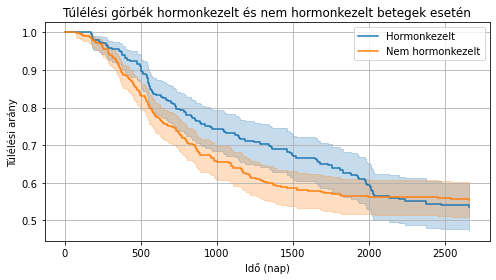

In [8]:
#KERESZTEZŐ GÖRBÉKRE KÉT LÉPCSŐS MÓDSZER - breast_cancer adathalmazt kézzel megváltoztattam
#Kaplan_Meier becslővel túlélési görbék
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

#adatok beolvasása
dk = pd.read_csv('breast_cancer_mod2.csv')

#maximális megfigyelési idő - és ezt úgy csináltam, hogy ebben az időpontben bekövetkezzen esemény mindkét csoportban - ez a tau is:)
max_rfstime_mod = dk['rfstime'].max()
#print(max_rfstime_mod)

#új DataFrame létrehozása módosításokkal
modified_dk = dk.copy()
modified_dk.loc[modified_dk['status'] == 0, 'rfstime'] = max_rfstime_mod

#módosított adatok mentése új fájlba
modified_dk.to_csv('breast_cancer_mod3.csv', index=False)

#hormonkezeltek-nem hormonkezeltek szétválasztása
hormon_treated3 = modified_dk[dk['hormon'] == 1]
hormon_not_treated3 = modified_dk[dk['hormon'] == 0]

#rövidítés bevezetése
kmf = KaplanMeierFitter()

#hormonkezeltek túlélési görbéje
plt.figure(figsize=(7, 4))
kmf.fit(durations=hormon_treated3['rfstime'], event_observed=hormon_treated3['status'], label='Hormonkezelt')
kmf.plot_survival_function()

#nem hormonkezeltek túlélési görbéje
kmf.fit(durations=hormon_not_treated3['rfstime'], event_observed=hormon_not_treated3['status'], label='Nem hormonkezelt')
kmf.plot_survival_function()

#diagramm
plt.title('Túlélési görbék hormonkezelt és nem hormonkezelt betegek esetén')
plt.xlabel('Idő (nap)')
plt.ylabel('Túlélési arány')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\Eszti\Downloads\anaconda\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\Eszti\Downloads\anaconda\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


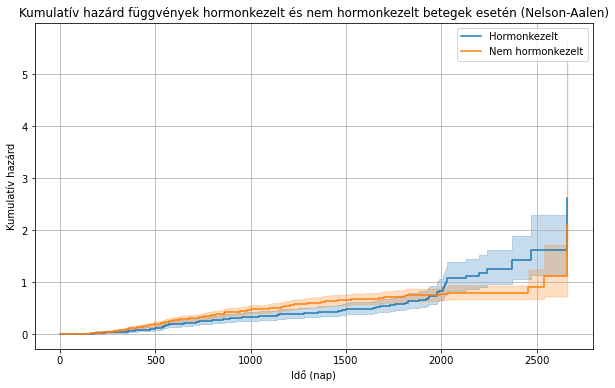

In [1]:
#Nelson-Aalen becslővel
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import NelsonAalenFitter

#adatok beolvasása
dk = pd.read_csv('breast_cancer_mod2.csv')

#hormonkezeltek-nem hormonkezeltek szétválasztása
hormon_treated2 = dk[dk['hormon'] == 1]
hormon_not_treated2 = dk[dk['hormon'] == 0]

#rövidítés bevezetése
naf = NelsonAalenFitter()

#hormonkezeltek túlélési görbéje
plt.figure(figsize=(10,6))
naf.fit(durations=hormon_treated2['rfstime'], event_observed=hormon_treated2['status'], label='Hormonkezelt')
naf.plot_cumulative_hazard()

#nem hormonkezeltek túlélési görbéje
naf.fit(durations=hormon_not_treated2['rfstime'], event_observed=hormon_not_treated2['status'], label='Nem hormonkezelt')
naf.plot_cumulative_hazard()

#Diagramm
plt.title('Kumulatív hazárd függvények hormonkezelt és nem hormonkezelt betegek esetén (Nelson-Aalen)')
plt.xlabel('Idő (nap)')
plt.ylabel('Kumulatív hazárd')
plt.legend()
plt.grid(True)
plt.show()



In [2]:
#log-rank statisztikával az eredmény
import pandas as pd
from lifelines.statistics import logrank_test

#fájlbeolvasás
dk = pd.read_csv('breast_cancer_mod2.csv')

#különválasztjuk a hormonkezelt és nem hormonkezelt betegek adatait
hormon_treated2 = dk[dk['hormon'] == 1]
hormon_not_treated2 = dk[dk['hormon'] == 0]

#log-rank teszt elvégzése
results = logrank_test(hormon_treated2['rfstime'], hormon_not_treated2['rfstime'],
                       event_observed_A=hormon_treated2['status'], event_observed_B=hormon_not_treated2['status'])

#eredmények kiíratása
print(results.summary)

#p nagyobb, mint 0,0253, ezért H_0-t nem tudjuk elutasítani, 
#log-rank szerint nincs különbség a túlélési függvények között

   test_statistic         p  -log2(p)
0        0.706696  0.400543  1.319972


In [3]:
D = dk[dk['status'] == 1]['rfstime'].max()
print(D)
n_1 = int(len(dk[(dk['hormon'] == 1)])) #hormonkezelt betegek száma
n_2 = int(len(dk[(dk['hormon'] == 0)])) #nem hormonkezelt betegek száma
print(n_1, n_2)
n = n_1 + n_2 #összes beteg száma

2659
246 440


In [4]:
#S(t) és L_j(t) becsléseinek kiszámítása
import pandas as pd
import numpy as np

#adatok beolvasása
dk = pd.read_csv('breast_cancer_mod2.csv')

#cenzorálás szerint adatok különválasztása
filtered1_dk = dk[dk['status'] == 1]
filtered2_dk = dk[dk['status'] == 0] #cenzorált rész

#segédtáblázat létrehozása
time_range = range(1, 2660)
result_dk = pd.DataFrame({'idő': time_range})

#kezdeti értékek
S_t = 1
L1_t = 1
L2_t = 1

#ciklus minden időpontra
for t in time_range:
    Y_i = int(len(filtered1_dk[filtered1_dk['rfstime'] >= t])) #összes vizsgált beteg az adott időpontban
    d_i = int(len(filtered1_dk[filtered1_dk['rfstime'] == t])) #összes esemény az adott időpontban
    
    #S becslése
    term_1 = 1 - (d_i / Y_i) if Y_i > 0 else np.nan
    S_t_prev = S_t  #előző S érték tárolása
    S_t = S_t * term_1 if not np.isnan(term_1) else S_t_prev  #ha term_3 nan, marad az előző érték

    #Delta S(t) kiszámítása
    Delta_S_t = S_t - S_t_prev
    
    Y_i1 = int(len(filtered2_dk[(filtered2_dk['hormon'] == 1) & (filtered2_dk['rfstime'] >= t)])) #hormonkezeltek száma cenzorált adatokban
    Y_i2 = int(len(filtered2_dk[(filtered2_dk['hormon'] == 0) & (filtered2_dk['rfstime'] >= t)])) #nem hormonkezeltek cenzorált adatokban
    d_i1 = int(len(filtered2_dk[(filtered2_dk['hormon'] == 1) & (filtered2_dk['rfstime'] == t)])) #halálok cenzorált adatoknál
    d_i2 = int(len(filtered2_dk[(filtered2_dk['hormon'] == 0) & (filtered2_dk['rfstime'] == t)]))
    
    #L_1, L_2 becslése
    term_2 = 1 - (d_i1 / Y_i1) if Y_i1 > 0 else np.nan
    term_3 = 1 - (d_i2 / Y_i2) if Y_i2 > 0 else np.nan
    
    L1_t_prev = L1_t
    L2_t_prev = L2_t
    
    L1_t = L1_t_prev * term_2 if not np.isnan(term_2) else L1_t_prev
    L2_t = L2_t_prev * term_3 if not np.isnan(term_3) else L2_t_prev
    #értékek hozzáadása az eredménytáblázathoz
    result_dk.loc[t-1, 'Y_i'] = Y_i
    result_dk.loc[t-1, 'd_i'] = d_i
    result_dk.loc[t-1, '1-(d_i/Y_i)'] = term_1
    result_dk.loc[t-1, 'S(t)'] = S_t
    result_dk.loc[t-1, 'Delta S(t)'] = Delta_S_t
    result_dk.loc[t-1, 'L1(t)'] = L1_t
    result_dk.loc[t-1, 'L2(t)'] = L2_t

#megjelenítés index nélkül
print(result_dk.head(10).to_string(index=False))


 idő   Y_i  d_i  1-(d_i/Y_i)  S(t)  Delta S(t)  L1(t)    L2(t)
   1 310.0  0.0          1.0   1.0         0.0    1.0 1.000000
   2 310.0  0.0          1.0   1.0         0.0    1.0 1.000000
   3 310.0  0.0          1.0   1.0         0.0    1.0 1.000000
   4 310.0  0.0          1.0   1.0         0.0    1.0 1.000000
   5 310.0  0.0          1.0   1.0         0.0    1.0 1.000000
   6 310.0  0.0          1.0   1.0         0.0    1.0 1.000000
   7 310.0  0.0          1.0   1.0         0.0    1.0 1.000000
   8 310.0  0.0          1.0   1.0         0.0    1.0 0.995902
   9 310.0  0.0          1.0   1.0         0.0    1.0 0.995902
  10 310.0  0.0          1.0   1.0         0.0    1.0 0.995902


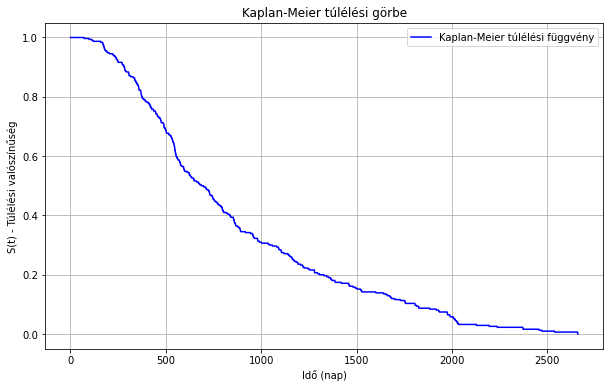

In [23]:
#ellenőrzés - S(t)  tényleg túlélési görbe
import matplotlib.pyplot as plt

result_dk['S(t)'] = pd.to_numeric(result_dk['S(t)'], errors='coerce')
# Feltételezzük, hogy a 'result_dk' DataFrame tartalmazza az időt ('idő') és S(t) értéket
plt.figure(figsize=(10, 6))
plt.plot(result_dk['idő'].values, result_dk['S(t)'].values, label='Kaplan-Meier túlélési függvény', color='blue')


# Diagram beállításai
plt.title('Kaplan-Meier túlélési görbe')
plt.xlabel('Idő (nap)')
plt.ylabel('S(t) - Túlélési valószínűség')
plt.legend()
plt.grid(True)

# Megjelenítés
plt.show()

In [5]:
#c_m kiszámítása
result_dk['term_1'] = (result_dk['L1(t)'] * result_dk['L2(t)']) / (((n_1 / n) * result_dk['L1(t)']) + ((n_2 / n) * result_dk['L2(t)']))
result_dk['weighted_delta_S'] = result_dk['term_1'] * result_dk['Delta S(t)']

#első összeg 1-től 1329-ig (0-tól mennek az indexek)
sum_first_part = result_dk.iloc[:1329]['weighted_delta_S'].sum()

#második összeg 1330-tól 2659-ig
sum_second_part = result_dk.iloc[1329:]['weighted_delta_S'].sum()

#c_m számítása
c_m = sum_first_part / sum_second_part

print(f"A c_m értéke: {c_m}")

A c_m értéke: 12.080998439251351


In [6]:
#V_m kiszámítása - segédtáblázat
import pandas as pd
import numpy as np

#adatok beolvasása
dk = pd.read_csv('breast_cancer_mod2.csv')

#segédtáblázat létrehozása
time_range = range(1, 2660)

result_dk1 = pd.DataFrame({'idő': time_range})



#ciklus minden időpontra
for t in time_range:
    #hormonkezeltek
    Y_i1 = int(len(dk[(dk['hormon'] == 1) & (dk['rfstime'] >= t)]))  #vizsgált hormonkezeltek száma
    d_i1 = int(len(dk[(dk['hormon'] == 1) & (dk['rfstime'] == t) & (dk['status'] == 1)]))  #meghalt/kiújult rák
    
    #nem hormonkezeltek
    Y_i2 = int(len(dk[(dk['hormon'] == 0) & (dk['rfstime'] >= t)]))  #vizsgált nem hormonkezeltek száma
    d_i2 = int(len(dk[(dk['hormon'] == 0) & (dk['rfstime'] == t) & (dk['status'] == 1)]))  #meghalt/kiújult rák
    
    #összes vizsgált egyed és összes kiújult rák/meghalt
    Y_i = Y_i1 + Y_i2
    d_i = d_i1 + d_i2
    

    if Y_i > 0: #ne legyen 0 az osztó
        term_1 = Y_i1 * (d_i / Y_i) if Y_i > 0 else 0
        term_2 = d_i1 - term_1
        term_3 = (Y_i1 / Y_i) * (Y_i2 / Y_i) * ((Y_i - d_i) / (Y_i - 1)) * d_i if Y_i > 1 else 0
    else:
        term_1 = term_2 = term_3 = np.nan  #ha Y_i nulla, a kifejezések nincsenek értelmezve

    #hozzáadjuk az értékeket az eredménytáblához
    result_dk1.loc[t-1, 'Y_i1'] = Y_i1
    result_dk1.loc[t-1, 'd_i1'] = d_i1
    result_dk1.loc[t-1, 'Y_i2'] = Y_i2
    result_dk1.loc[t-1, 'd_i2'] = d_i2
    result_dk1.loc[t-1, 'Y_i'] = Y_i
    result_dk1.loc[t-1, 'd_i'] = d_i
    result_dk1.loc[t-1, 'Y_i1*(d_i/Y_i)'] = term_1
    result_dk1.loc[t-1, 'd_i1-Y_i1*(d_i/Y_i)'] = term_2
    result_dk1.loc[t-1, '(Y_i1/Y_i)*(Y_i2/Y_i))*((Y_i-d_i)/(Y_i-1))*d_i'] = term_3


#megjelenítés index nélkül
print(result_dk1.head(10).to_string(index=False))

 idő  Y_i1  d_i1  Y_i2  d_i2   Y_i  d_i  Y_i1*(d_i/Y_i)  d_i1-Y_i1*(d_i/Y_i)  (Y_i1/Y_i)*(Y_i2/Y_i))*((Y_i-d_i)/(Y_i-1))*d_i
   1 246.0   0.0 440.0   0.0 686.0  0.0             0.0                  0.0                                             0.0
   2 246.0   0.0 440.0   0.0 686.0  0.0             0.0                  0.0                                             0.0
   3 246.0   0.0 440.0   0.0 686.0  0.0             0.0                  0.0                                             0.0
   4 246.0   0.0 440.0   0.0 686.0  0.0             0.0                  0.0                                             0.0
   5 246.0   0.0 440.0   0.0 686.0  0.0             0.0                  0.0                                             0.0
   6 246.0   0.0 440.0   0.0 686.0  0.0             0.0                  0.0                                             0.0
   7 246.0   0.0 440.0   0.0 686.0  0.0             0.0                  0.0                                             0.0


In [7]:
#V_m folytatás

#w_i2 meghatározása
result_dk1['w_i2'] = -1
result_dk1['w_i2'] = result_dk1['w_i2'].astype(float)
result_dk1.loc[1329:, 'w_i2'] = c_m

#az első összeg eleme
result_dk1['first_part'] = result_dk1['w_i2'] * (result_dk1['d_i1-Y_i1*(d_i/Y_i)'])

#a második eleme
result_dk1['second_part'] = result_dk1['w_i2']**2 * (result_dk1['(Y_i1/Y_i)*(Y_i2/Y_i))*((Y_i-d_i)/(Y_i-1))*d_i'])

#az első és második összeg kiszámítása
sum_first_part = result_dk1['first_part'].sum()
sum_second_part = result_dk1['second_part'].sum()

#V_m számítása
V_m = sum_first_part / np.sqrt(sum_second_part)

print(f"A V_m értéke: {V_m}")


A V_m értéke: 4.20594363927825


In [8]:
#V_m-ek szuprémuma

#Keresett intervallum
m_values = range(132, 2528)
best_Vm = -np.inf
best_m = None

for m in m_values:
    #c_m számítása
    numerator = result_dk.loc[:m, 'L1(t)'] * result_dk.loc[:m, 'L2(t)'] * result_dk.loc[:m, 'Delta S(t)']
    numerator = numerator / (((n_1/n) * result_dk.loc[:m-1, 'L1(t)']) + ((n_2/n) * result_dk.loc[:m, 'L2(t)']))
    
    denominator = result_dk.loc[m:, 'L1(t)'] * result_dk.loc[m:, 'L2(t)'] * result_dk.loc[m:, 'Delta S(t)']
    denominator = denominator / (((n_1/n) * result_dk.loc[m:, 'L1(t)']) + ((n_2/n) * result_dk.loc[m:, 'L2(t)']))
    
    c_m = numerator.sum() / denominator.sum() if denominator.sum() != 0 else np.nan

    #w_i2 beállítása
    result_dk1['w_i2'] = -1
    result_dk1['w_i2'] = result_dk1['w_i2'].astype(float)
    result_dk1.loc[m:, 'w_i2'] = c_m

    #V_m számlálója
    result_dk1['first_part'] = result_dk1['w_i2'] * (result_dk1['d_i1-Y_i1*(d_i/Y_i)'])

    #V_m nevezője
    result_dk1['second_part'] = result_dk1['w_i2']**2 * (result_dk1['(Y_i1/Y_i)*(Y_i2/Y_i))*((Y_i-d_i)/(Y_i-1))*d_i'])

    sum_first_part = result_dk1['first_part'].sum()
    sum_second_part = result_dk1['second_part'].sum()

    V_m = sum_first_part / np.sqrt(sum_second_part) if sum_second_part > 0 else np.nan

    if not np.isnan(V_m) and V_m > best_Vm:
        best_Vm = V_m
        best_m = m

print(f"A maximális V_m értéke: {best_Vm}, az optimális m: {best_m}")


A maximális V_m értéke: 4.66190268222463, az optimális m: 1814
